# Preparation

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

In [7]:
data = {
    "NAMA": ["AIDA", "ARIEF", "ADI", "JASMINE", "LAELA", "FIRDAUS", "INSAN", "HUSNI", "FAQIH", "DWI", "RIZKI", "EFENDI", "ZAKY", "LINDA"],
    "TEKANAN_DARAH": [129, 115, 122, 142, 148, 143, 108, 138, 107, 104, 148, 147, 137, 120],
    "BERAT_BADAN": [60, 58, 57, 80, 75, 78, 50, 70, 51, 45, 90, 88, 71, 55]
}

data = pd.DataFrame(data)

# EDA

In [8]:
data.head()

,NAMA,TEKANAN_DARAH,BERAT_BADAN
0,AIDA,129,60
1,ARIEF,115,58
2,ADI,122,57
3,JASMINE,142,80
4,LAELA,148,75


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   NAMA           14 non-null     object
 1   TEKANAN_DARAH  14 non-null     int64 
 2   BERAT_BADAN    14 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 468.0+ bytes


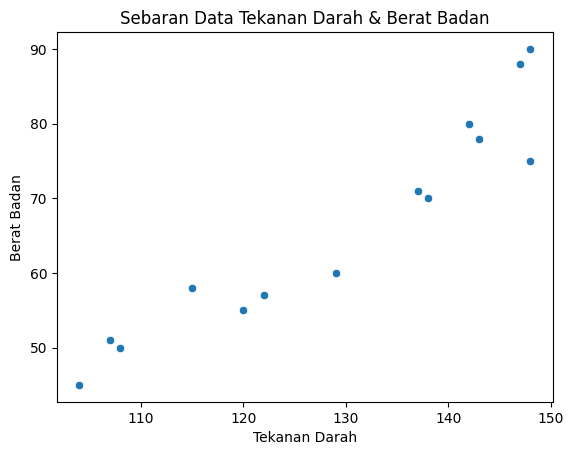

In [11]:
sns.scatterplot(x=data['TEKANAN_DARAH'], y=data['BERAT_BADAN'])
plt.title('Sebaran Data Tekanan Darah & Berat Badan')
plt.xlabel('Tekanan Darah')
plt.ylabel('Berat Badan')
plt.show()

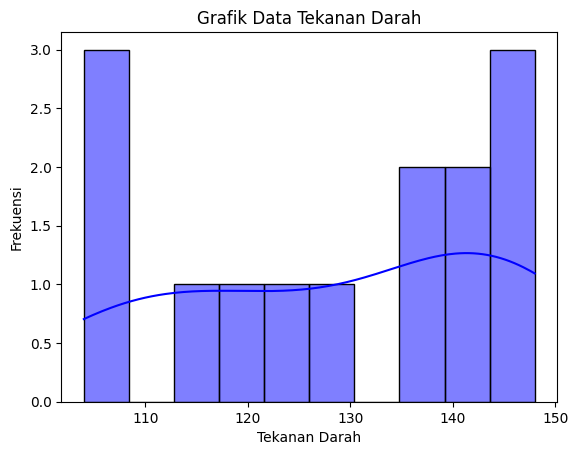

In [13]:
sns.histplot(data['TEKANAN_DARAH'], bins=10, kde=True, color='blue')
plt.title('Grafik Data Tekanan Darah')
plt.xlabel('Tekanan Darah')
plt.ylabel('Frekuensi')
plt.show()

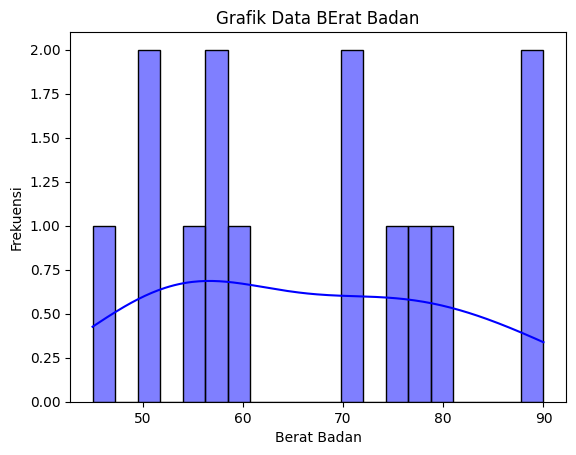

In [14]:
sns.histplot(data['BERAT_BADAN'], bins=20, kde=True, color='blue')
plt.title('Grafik Data BErat Badan')
plt.xlabel('Berat Badan')
plt.ylabel('Frekuensi')
plt.show()

# Outlier With Boxplot

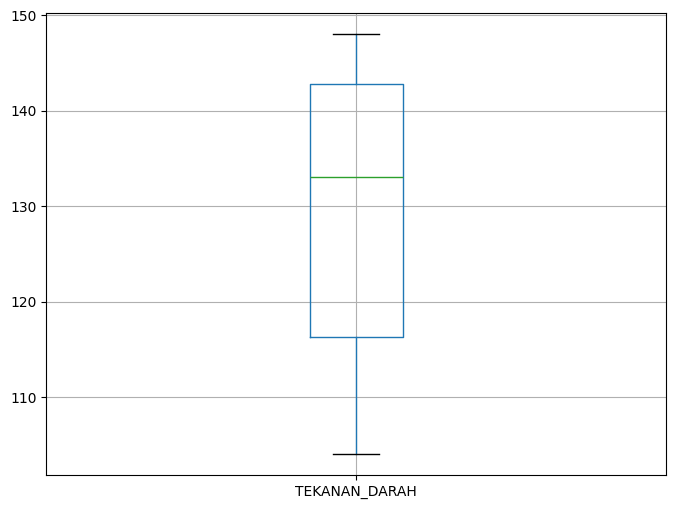

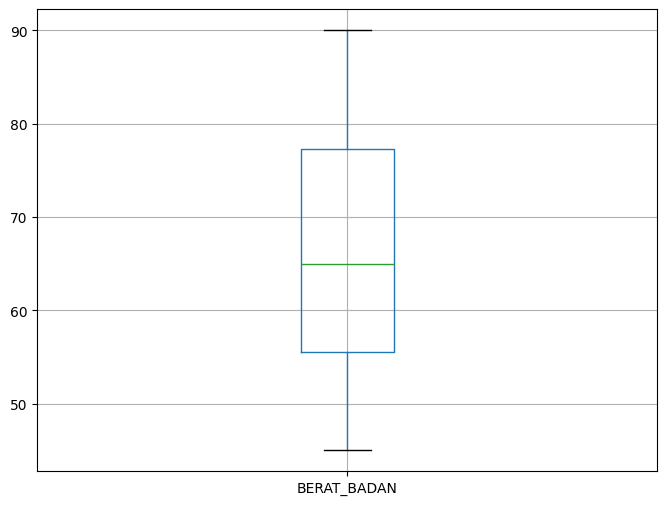

In [15]:
numericColumns = ['TEKANAN_DARAH', 'BERAT_BADAN']

for column in data[numericColumns]:
    plt.figure(figsize=(8, 6))
    data.boxplot(column=[column])

# K-Means Clustering

In [16]:
numericColumns = ['TEKANAN_DARAH', 'BERAT_BADAN']
dataNum = data[numericColumns]

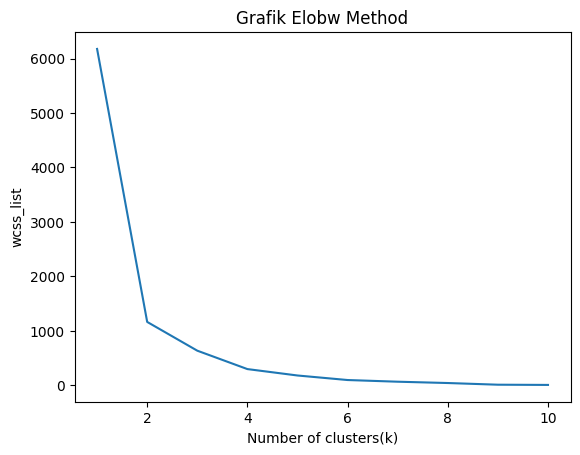

In [17]:
wcss_list = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(dataNum)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_list)
plt.title('Grafik Elobw Method')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show() 

In [18]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_means = kmeans.fit_predict(dataNum)

In [19]:
dataNum['cluster'] = y_means

In [20]:
kmeans.cluster_centers_

array([[143.28571429,  78.85714286],
       [115.        ,  53.71428571]])

In [21]:
dataNum.groupby('cluster').mean()                                       

,TEKANAN_DARAH,BERAT_BADAN
cluster,,
0,143.285714,78.857143
1,115.000000,53.714286


In [23]:
# Menghitung deskripsi statistik untuk kolom TINGGI berdasarkan cluster
tekanan_darah_stats = dataNum.groupby("cluster")["TEKANAN_DARAH"].describe()
tekanan_darah_stats

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,7.0,143.285714,4.608481,137.0,140.0,143.0,147.5,148.0
1,7.0,115.000000,9.165151,104.0,107.5,115.0,121.0,129.0


In [24]:
berat_badan_stats = dataNum.groupby("cluster")["BERAT_BADAN"].describe()
berat_badan_stats

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,7.0,78.857143,7.798046,70.0,73.0,78.0,84.0,90.0
1,7.0,53.714286,5.282496,45.0,50.5,55.0,57.5,60.0


In [25]:
agrupador_kmeans = KMeans(n_clusters = 2)
labels_kmeans = agrupador_kmeans.fit_predict(dataNum)
print("Labels K-means: ", labels_kmeans)

Labels K-means:  [1 1 1 0 0 0 1 0 1 1 0 0 0 1]


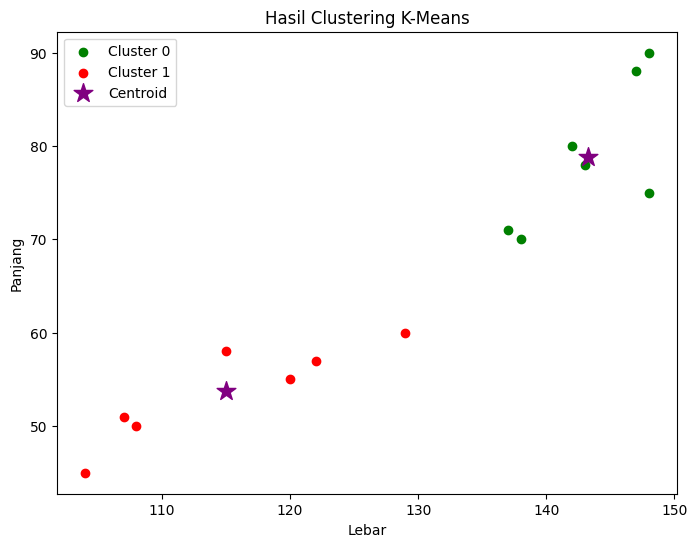

In [27]:
# Membuat plot hasil clustering
plt.figure(figsize=(8,6))
plt.title('Hasil Clustering K-Means')
plt.xlabel('Lebar')
plt.ylabel('Panjang')

data1 = dataNum[dataNum.cluster == 0]
data2 = dataNum[dataNum.cluster == 1]

plt.scatter(data1['TEKANAN_DARAH'], data1['BERAT_BADAN'], color='green', label='Cluster 0')
plt.scatter(data2['TEKANAN_DARAH'], data2['BERAT_BADAN'], color='red', label='Cluster 1')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='purple', marker='*', s=200, label='Centroid')

plt.legend()

plt.show()